In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

In [27]:
SnP = pd.read_csv("SnP_daily_update.csv")
print(SnP.head())

        Price               Close            Close.1 Close.2 Close.3  \
0      Ticker                   A               AAPL    ABBV    ABNB   
1        Date                 NaN                NaN     NaN     NaN   
2  2010-01-04  20.016029357910156  6.440330505371094     NaN     NaN   
3  2010-01-05   19.79861068725586  6.451466083526611     NaN     NaN   
4  2010-01-06   19.72825813293457  6.348845958709717     NaN     NaN   

              Close.4             Close.5             Close.6  \
0                 ABT                ACGL                 ACN   
1                 NaN                 NaN                 NaN   
2   18.66575813293457    7.60190486907959  31.941789627075195   
3   18.51495361328125  7.5765485763549805  32.139198303222656   
4  18.617780685424805   7.543794631958008  32.480857849121094   

              Close.7             Close.8  ... Volume.493 Volume.494  \
0                ADBE                 ADI  ...        WTW         WY   
1                 NaN           

C:\Users\gabri\AppData\Local\Temp\ipykernel_22724\554706603.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255

# Inspect the Data and Loading

In [28]:
print(SnP.isnull().sum)

<bound method DataFrame.sum of       Price  Close  Close.1  Close.2  Close.3  Close.4  Close.5  Close.6  \
0     False  False    False    False    False    False    False    False   
1     False   True     True     True     True     True     True     True   
2     False  False    False     True     True    False    False    False   
3     False  False    False     True     True    False    False    False   
4     False  False    False     True     True    False    False    False   
...     ...    ...      ...      ...      ...      ...      ...      ...   
3799  False  False    False    False    False    False    False    False   
3800  False  False    False    False    False    False    False    False   
3801  False  False    False    False    False    False    False    False   
3802  False  False    False    False    False    False    False    False   
3803  False  False    False    False    False    False    False    False   

      Close.7  Close.8  ...  Volume.493  Volume.494  Vol

In [29]:
print(SnP.describe())

             Price               Close     Close.1      Close.2  Close.3  \
count         3804                3803  3803.00000  3049.000000   1049.0   
unique        3804                3628  3752.00000  2954.000000    992.0   
top     2025-02-12  18.653919219970703    22.31505    22.484785    132.5   
freq             1                   4     2.00000     3.000000      4.0   

            Close.4      Close.5      Close.6      Close.7      Close.8  ...  \
count   3803.000000  3803.000000  3803.000000  3803.000000  3803.000000  ...   
unique  3590.000000  3163.000000  3679.000000  3526.000000  3663.000000  ...   
top       29.421001    17.344389    43.466816    33.549999    70.049507  ...   
freq       3.000000     5.000000     3.000000     4.000000     3.000000  ...   

        Volume.493  Volume.494  Volume.495 Volume.496 Volume.497  Volume.498  \
count         3803        3803        3803       3803       3803      3354.0   
unique        3475        3699        3630       3627     

In [30]:
print(SnP.dtypes)

Price         object
Close         object
Close.1       object
Close.2       object
Close.3       object
               ...  
Volume.498    object
Volume.499    object
Volume.500    object
Volume.501    object
Volume.502    object
Length: 2516, dtype: object


# Clean and Preprocess the Data

In [31]:
# Drop rows with missing values
SnP.dropna(inplace=True)
SnP.fillna(method='ffill', inplace=True)  # Forward-fill
SnP.fillna(method='bfill', inplace=True)  # Backward-fill


C:\Users\gabri\AppData\Local\Temp\ipykernel_22724\1630760680.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  SnP.fillna(method='ffill', inplace=True)  # Forward-fill
C:\Users\gabri\AppData\Local\Temp\ipykernel_22724\1630760680.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  SnP.fillna(method='bfill', inplace=True)  # Backward-fill


In [32]:
if 'Date' in SnP.columns:
	SnP['Date'] = pd.to_datetime(SnP['Date'])
	SnP.set_index('Date', inplace=True)
else:
	print("Column 'Date' does not exist in the dataframe.")

Column 'Date' does not exist in the dataframe.


In [33]:
# Convert 'Close' column to numeric values
SnP['Close'] = pd.to_numeric(SnP['Close'], errors='coerce')

# Calculate daily return
SnP['Daily Return'] = SnP['Close'].pct_change()

In [34]:
SnP['MA_50'] = SnP['Close'].rolling(window=50).mean()
SnP['MA_200'] = SnP['Close'].rolling(window=200).mean()

In [35]:
SnP['Log Return'] = np.log(SnP['Close'] / SnP['Close'].shift(1))

# Exploratory Data Analysis (EDA)

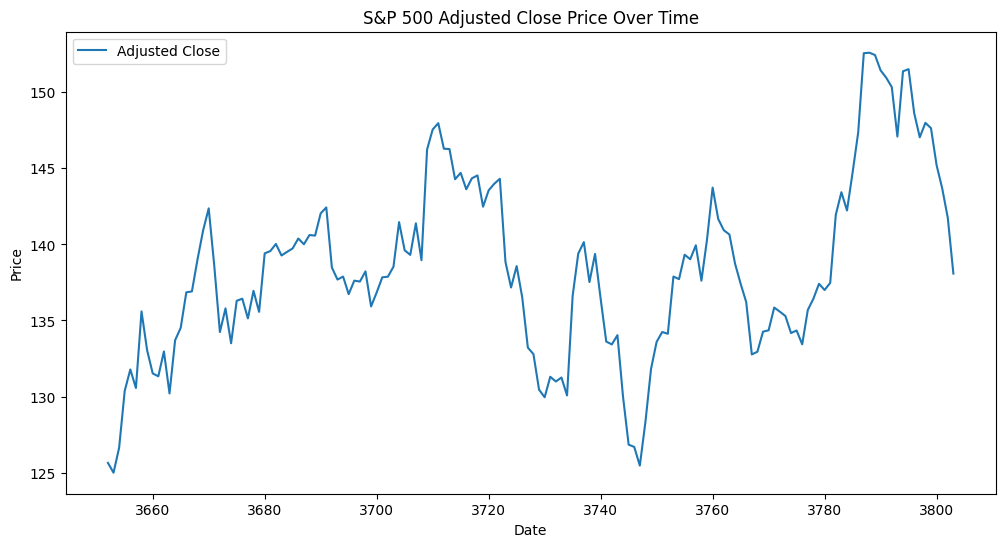

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(SnP.index, SnP['Close'], label='Adjusted Close')
plt.title('S&P 500 Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

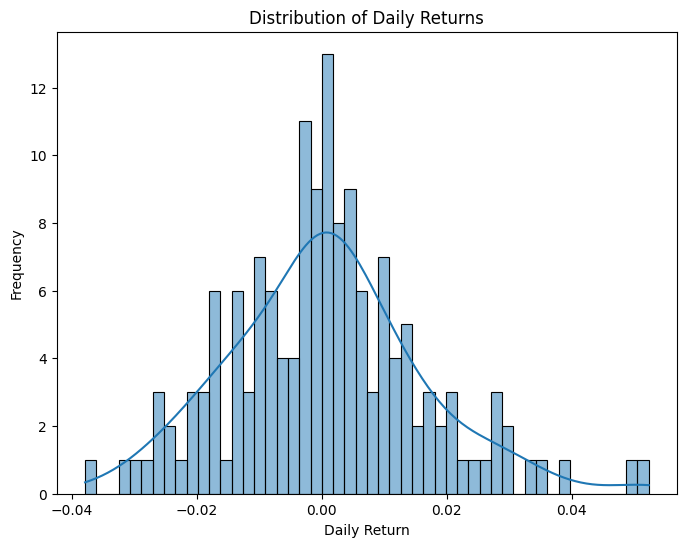

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(SnP['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

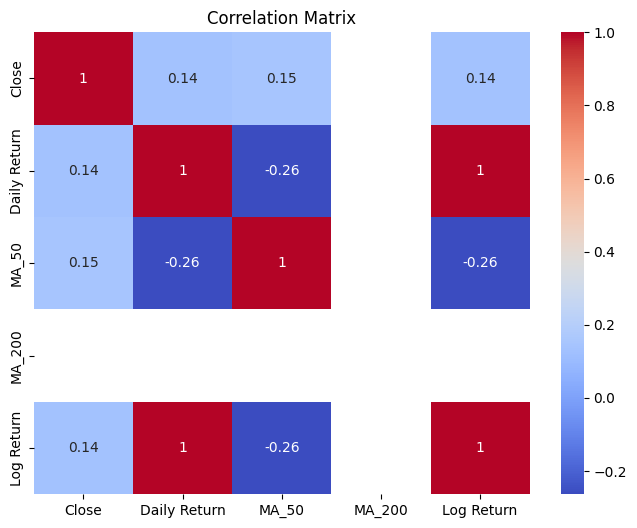

In [38]:
# Select only numeric columns
numeric_cols = SnP.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

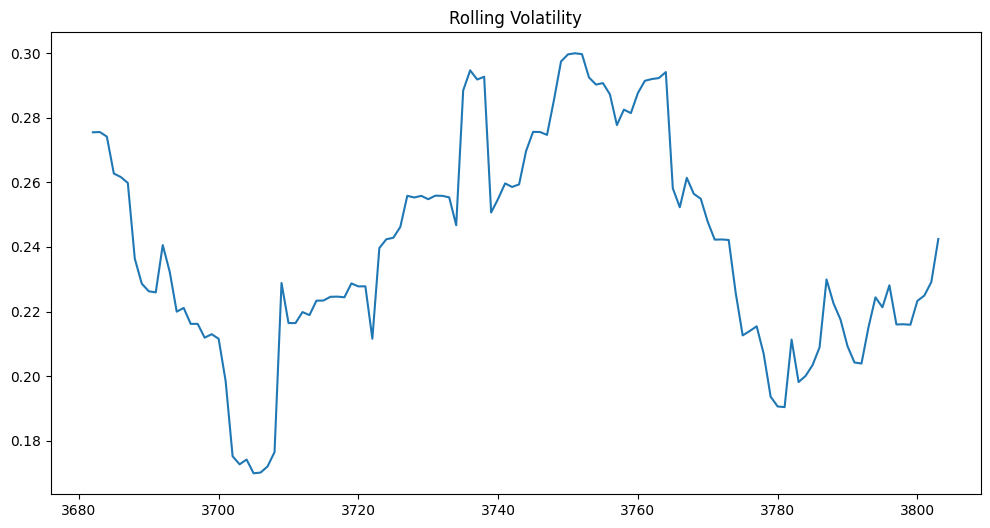

In [39]:
SnP['Volatility'] = SnP['Daily Return'].rolling(window=30).std() * np.sqrt(252)
plt.figure(figsize=(12, 6))
plt.plot(SnP.index, SnP['Volatility'])
plt.title('Rolling Volatility')
plt.show()

# Advanced Analysis

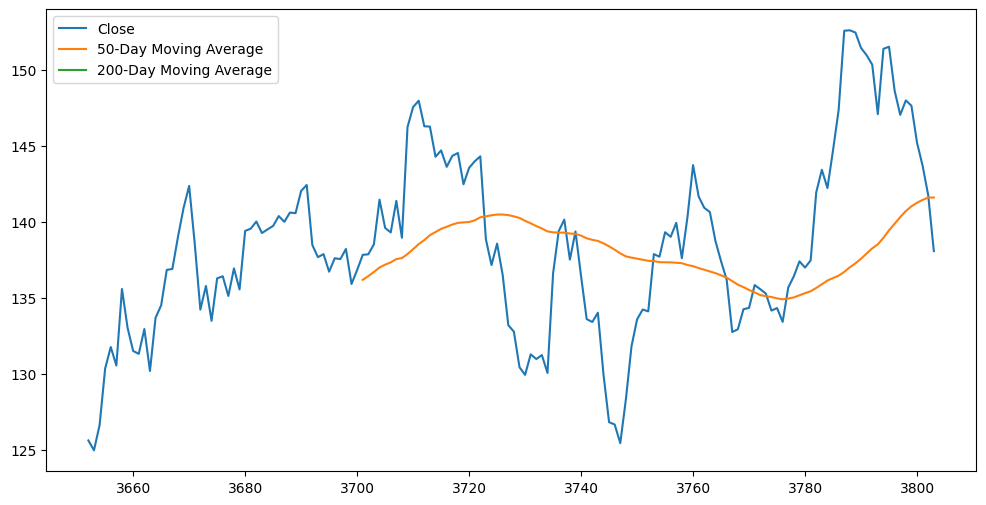

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(SnP.index, SnP['Close'], label='Close')
plt.plot(SnP.index, SnP['MA_50'], label='50-Day Moving Average')
plt.plot(SnP.index, SnP['MA_200'], label='200-Day Moving Average')
plt.legend()
plt.show()

In [41]:
model = ARIMA(SnP['Close'], order=(5, 1, 0))  # Example parameters
model_fit = model.fit()

print(model_fit.summary())

# Forecast future values
forecast = model_fit.forecast(steps=30)
print(forecast)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  153
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -334.941
Date:                Thu, 13 Feb 2025   AIC                            681.881
Time:                        13:53:30   BIC                            700.025
Sample:                             0   HQIC                           689.252
                                - 153                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0424      0.086      0.493      0.622      -0.126       0.211
ar.L2          0.0421      0.107      0.395      0.693      -0.167       0.251
ar.L3          0.0605      0.089      0.678      0.4

c:\Users\gabri\anaconda3\envs\ToolsForData\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\gabri\anaconda3\envs\ToolsForData\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\gabri\anaconda3\envs\ToolsForData\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\gabri\anaconda3\envs\ToolsForData\Lib\site-packages\statsmodels\tsa\base\tsa_model.py